In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('telco_data_dummies.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,1,0,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,2,0,53.85,108.15,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [5]:
df = df.drop('Unnamed: 0', axis = 1)
x = df.drop('Churn', axis = 1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [6]:
y = df['Churn']

### train/test split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### decision tree classifier 

In [28]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 6, min_samples_leaf = 8)

model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)
modeldt_score = model_dt.score(x_test, y_test)
print(f'Score of model_dt = {modeldt_score}\n')

Score of model_dt = 0.7683013503909026



In [9]:
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1033
           1       0.59      0.41      0.48       374

    accuracy                           0.77      1407
   macro avg       0.70      0.65      0.67      1407
weighted avg       0.75      0.77      0.75      1407



* As we can see, the accuracy is quite low, and since it is an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.<br><br>

* Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident from the classification_report that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.<br><br>

* This it is necessary for us to avail SMOTEENN (Synthetic Minority Oversampling Technique + Edited Nearest Neighbor)

## Resampling (SMOTEENN) 

In [10]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [11]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, random_state = 42, test_size = 0.2)

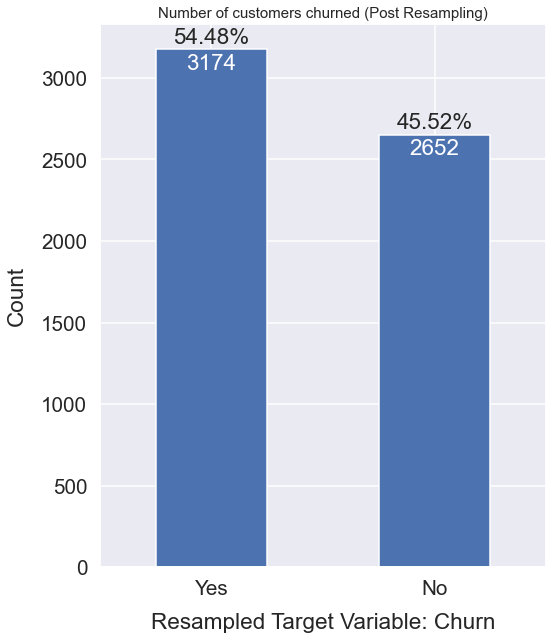

In [12]:
sns.set()
sns.set_context('talk', font_scale = 1.25)
y_resampled.value_counts().plot(kind = 'bar', figsize = (8, 10))
plt.ylabel("Count", labelpad = 14)
plt.xlabel("Resampled Target Variable: Churn", labelpad = 14)
plt.title("Number of customers churned (Post Resampling)", fontsize = 15)
plt.xticks(rotation = 'horizontal')

def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i][1]+40, str(y[i][0]) + '%', ha = 'center')
        plt.text(i, y[i][1]-120, str(y[i][1]), ha = 'center', c = 'white')
        
y_perc = round(y_resampled.value_counts()*100/len(y_resampled), 2)
y_loc = y_resampled.value_counts()
x = ['Yes', 'No']
y = [[y_perc[1], y_loc[1]], [y_perc[0], y_loc[0]]]
plt.xticks([0, 1], x)
add_labels(x, y)

## Decision Tree Classifier with SMOTEENN

In [13]:
model_dt_smote = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 6, min_samples_leaf = 8)

In [46]:
model_dt_smote.fit(xr_train, yr_train)
yr_pred_dt_smote = model_dt_smote.predict(xr_test)
modeldt_r_score = model_dt_smote.score(xr_test, yr_test)
print(f'Score of model_dt_smote = {modeldt_r_score}\n')
print(metrics.classification_report(yr_test, yr_pred))

Score of model_dt_smote = 0.9202401372212693

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       545
           1       0.92      0.94      0.93       621

    accuracy                           0.92      1166
   macro avg       0.92      0.92      0.92      1166
weighted avg       0.92      0.92      0.92      1166



Text(0.5, 1.0, 'Decision Tree with SMOTEENN: Confusion Matrix')

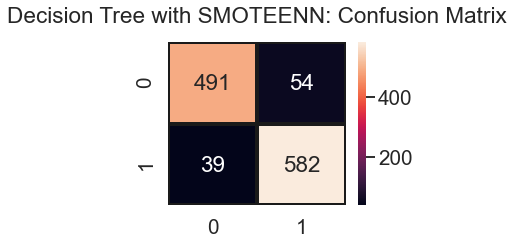

In [47]:
plt.figure(figsize = (4,3))
sns.heatmap(metrics.confusion_matrix(yr_test, yr_pred_dt_smote), annot = True, fmt = "d", linecolor = 'k', linewidth = 3)
plt.title("Decision Tree with SMOTEENN: Confusion Matrix", pad = '20.0')

* Now we can see much better results, i.e. Accuracy: 95 %, and an equally good recall, precision & f1 score for minority class.
* Let's try the same procedure with some other classifiers. 

## RandomForest Classifier 

In [16]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 6, min_samples_leaf = 8)

model_rfc.fit(x_train, y_train)

y_pred_rfc = model_rfc.predict(x_test)

model_rfc_score = model_rfc.score(x_train, y_train)
print(f'Score of model_rfc = {model_rfc_score}\n')
print(metrics.classification_report(y_test, y_pred_rfc, labels = [0,1]))

Score of model_rfc = 0.8108444444444445

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.65      0.40      0.50       374

    accuracy                           0.78      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.78      0.77      1407



## RandomForest Classifier with SMOTEENN

In [17]:
model_rfc_smot = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 6, min_samples_leaf = 8)

In [18]:
model_rfc_smot.fit(xr_train, yr_train)

y_pred_rfc_smot = model_rfc_smot.predict(xr_test)

model_rfc_smot_score = model_rfc_smot.score(xr_train, yr_train)
print(f'Score of model_rfc_smot = {model_rfc_smot_score}\n')
print(metrics.classification_report(yr_test, y_pred_rfc_smot, labels = [0,1]))

Score of model_rfc_smot = 0.9371244635193133

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       545
           1       0.91      0.97      0.94       621

    accuracy                           0.93      1166
   macro avg       0.94      0.93      0.93      1166
weighted avg       0.93      0.93      0.93      1166



Text(0.5, 1.0, 'Random forest with SMOTEENN Confusion Matrix')

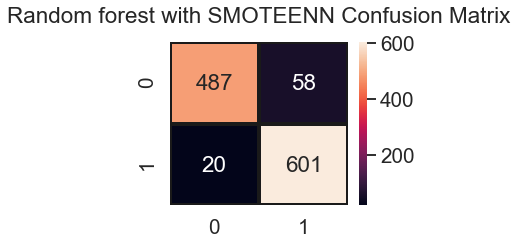

In [40]:
plt.figure(figsize = (4,3))
sns.heatmap(metrics.confusion_matrix(yr_test, y_pred_rfc_smot), annot = True, fmt = "d", linecolor = 'k', linewidth = 3)
plt.title("Random forest with SMOTEENN: Confusion Matrix", pad = '20.0')

Text(0.5, 1.0, 'Random Forest ROC Curve')

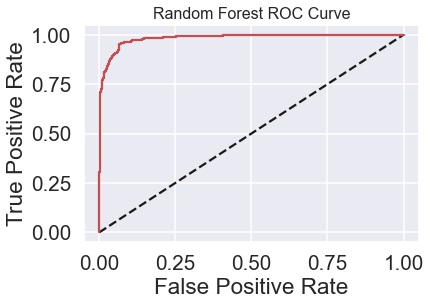

In [57]:
y_rf_predproba = model_rfc_smot.predict_proba(xr_test)[:, 1]

fpr_rf, tpr_rf, thresholds = roc_curve(yr_test, y_rf_predproba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest with SMOTENN', color = 'r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)

## PCA (Principal component Analysis) 

In [20]:
from sklearn.decomposition import PCA
pca = PCA(0.9)

xr_train_pca = pca.fit_transform(xr_train)
xr_test_pca = pca.fit_transform(xr_test)

explained_variance = pca.explained_variance_ratio_

In [21]:
pca_rfc = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42, max_depth = 6, min_samples_leaf = 8)

pca_rfc.fit(xr_train_pca, yr_train)

yr_pred_pca_rfc = pca_rfc.predict(xr_test_pca)

pca_rfc_score = pca_rfc.score(xr_test_pca, yr_test)

print(f'Score of pca_rfc = {pca_rfc_score}\n')
print(metrics.classification_report(yr_test, yr_pred_pca_rfc))

Score of pca_rfc = 0.6783876500857633

              precision    recall  f1-score   support

           0       0.69      0.57      0.62       545
           1       0.67      0.77      0.72       621

    accuracy                           0.68      1166
   macro avg       0.68      0.67      0.67      1166
weighted avg       0.68      0.68      0.67      1166



### Let us try a few other models using our SMOTEENN upsampled data 

### KNN  

In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(xr_train, yr_train)
y_pred_knn = knn_model.predict(xr_test)
knn_score = knn_model.score(xr_test, yr_test)
print(f'knn score: {knn_score}\n')
print(classification_report(yr_test, y_pred_knn))

knn score: 0.9373927958833619

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       545
           1       0.94      0.94      0.94       621

    accuracy                           0.94      1166
   macro avg       0.94      0.94      0.94      1166
weighted avg       0.94      0.94      0.94      1166



### SVC 

In [52]:
svc_model = SVC(random_state = 1)
svc_model.fit(xr_train, yr_train)
y_pred_svc = svc_model.predict(xr_test)
svc_score = svc_model.score(xr_test,yr_test)
print("SVM accuracy is :",svc_score)
print(classification_report(yr_test, y_pred_svc))

SVM accuracy is : 0.7530017152658662
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       545
           1       0.82      0.69      0.75       621

    accuracy                           0.75      1166
   macro avg       0.76      0.76      0.75      1166
weighted avg       0.76      0.75      0.75      1166



In [69]:
def model_ops(model, model_name):
    model = model.fit(xr_train, yr_train)
    y_pred = model.predict(xr_test)
    model_score = model.score(xr_test, yr_test)
    print(f'{model_name} accuracy is: {model_score}\n')
    print(classification_report(yr_test, y_pred))
    
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(yr_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(f"{model_name} CONFUSION MATRIX",fontsize=14)
    
    plt.figure(figsize = (6, 5))
    y_predproba = model.predict_proba(xr_test)[:, 1]
    fpr_rf, tpr_rf, thresholds = roc_curve(yr_test, y_predproba)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr_rf, tpr_rf, label = f'{model_name}', color = 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve',fontsize=16)

### Logistic Regression

C:\Users\asd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy is: 0.9219554030874786

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       545
           1       0.94      0.92      0.93       621

    accuracy                           0.92      1166
   macro avg       0.92      0.92      0.92      1166
weighted avg       0.92      0.92      0.92      1166



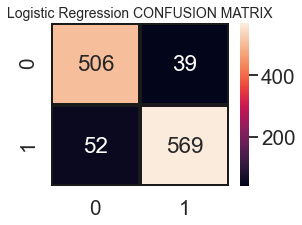

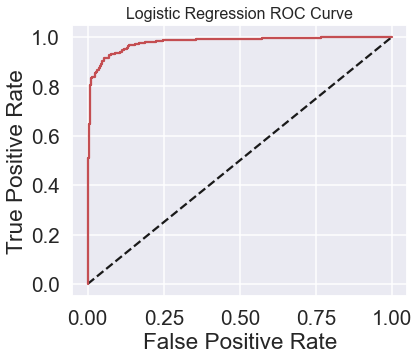

In [70]:
model_logreg = LogisticRegression()
model_ops(model_logreg, 'Logistic Regression')

### Adaptive Boosting

AdaBoost Classifier accuracy is: 0.9442538593481989

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       545
           1       0.94      0.96      0.95       621

    accuracy                           0.94      1166
   macro avg       0.94      0.94      0.94      1166
weighted avg       0.94      0.94      0.94      1166



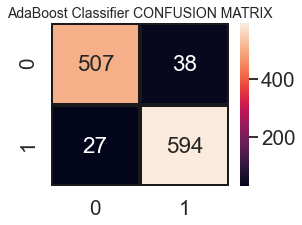

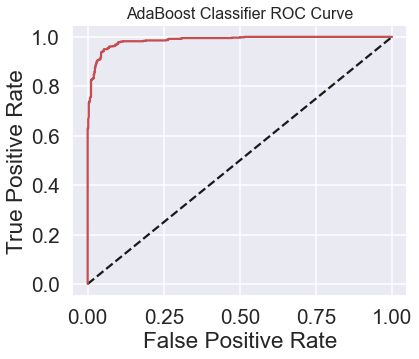

In [72]:
a_model = AdaBoostClassifier()
model_ops(a_model, 'AdaBoost Classifier')

### Gradient Boosting 

Gradient Boosting accuracy is: 0.9536878216123499

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       545
           1       0.95      0.96      0.96       621

    accuracy                           0.95      1166
   macro avg       0.95      0.95      0.95      1166
weighted avg       0.95      0.95      0.95      1166



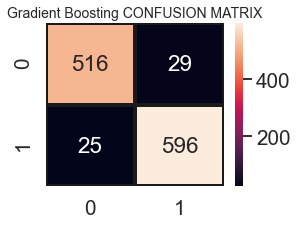

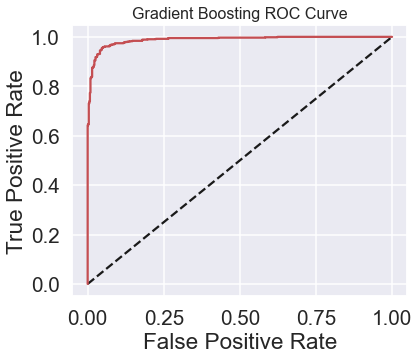

In [73]:
gb_model = GradientBoostingClassifier()
model_ops(gb_model, "Gradient Boosting")

Lets finalize the model that was created by Xtreme Gradient Boosting Classifier, and save the model so that we can use it in a later stage 

C:\Users\asd\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:47:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "binary" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:47:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG-Boost Classifier accuracy is: 0.9588336192109777

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       545
           1       0.96      0.97      0.96       621

    accuracy                           0.96      1166
   m

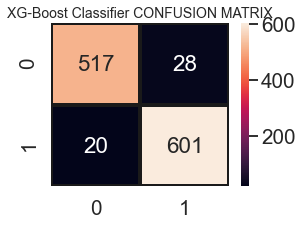

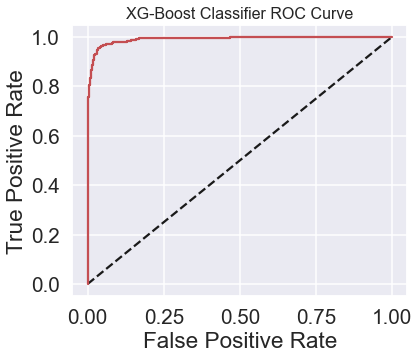

In [78]:
xgb_model = XGBClassifier(binary = "logloss")
model_ops(xgb_model, "XG-Boost Classifier")

### Pickling the model 

In [79]:
import pickle
filename = 'model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [80]:
load_model = pickle.load(open(filename, 'rb'))
model_score = load_model.score(xr_test, yr_test)

print(model_score)

0.9588336192109777


* Our final model i.e. Decision Tree Classifier with SMOTEENN is now ready and dumped in model.sav
* Now we will prepare and use API calls so that we can access our model from UI. 